In [1]:
import pandas as pd
import random
from matplotlib import cm
import matplotlib as mpl
import matplotlib.colors as mcolors
from collections import defaultdict, Counter
font_name = "simsun"
mpl.rcParams['font.family']=font_name
mpl.rcParams['axes.unicode_minus']=False
import matplotlib.pyplot as plt
import re
plt.style.use('ggplot')

In [49]:
data = pd.read_csv("../data/douban_comments_27180943.csv", index_col=0, error_bad_lines=False)

In [50]:
data.head(5)

,uid,star,comment,movie
0,68021820,★★★★★,宏大的盗墓世界让人欲罢不能，三叔的编剧能力非同小可。,重启之极海听雷 (2020)
1,68021820,★★★★☆,演员演技都还不错，人物性格也千差万别，几个人在一起相处还挺有看点的，ps我好喜欢大宝大大咧咧...,二十不惑 (2020)
2,68021820,★★★★☆,私以为是李沁演过最好的一部剧，完全把她的优点展现出来了,锦绣南歌 (2020)
3,68021820,★★★★★,NaN,寻味东莞 (2020)
4,68021820,★★★★☆,NaN,少年之名 (2020)


In [51]:
data.drop_duplicates(["uid", "movie"], inplace=True)

In [52]:
def convert_star_score(x):
    if str(x) != "nan":
        return x.count("★")
    return None
def convert_comment(x):
    return re.sub('[^\u4e00-\u9fffA-Za-z0-9]+', '', str(x))
def convert_movie(x):
    if "诛仙" in x:
        return "诛仙1"
    elif "99分女朋友" in x:
        return "99分女朋友"
    else:
        return re.sub('[^\u4e00-\u9fffA-Za-z]+', '', str(x))
data["score"] = data["star"].apply(lambda x: convert_star_score(x))
data["comment"] = data["comment"].apply(lambda x: convert_comment(x))
data["movie"] = data["movie"].apply(lambda x: convert_movie(x))
data.head(5)

,uid,star,comment,movie,score
0,68021820,★★★★★,宏大的盗墓世界让人欲罢不能三叔的编剧能力非同小可,重启之极海听雷,5.0
1,68021820,★★★★☆,演员演技都还不错人物性格也千差万别几个人在一起相处还挺有看点的ps我好喜欢大宝大大咧咧的性格啊,二十不惑,4.0
2,68021820,★★★★☆,私以为是李沁演过最好的一部剧完全把她的优点展现出来了,锦绣南歌,4.0
3,68021820,★★★★★,nan,寻味东莞,5.0
4,68021820,★★★★☆,nan,少年之名,4.0


In [200]:
for comment in set(data.loc[data["movie"]=="重启之极海听雷"]["comment"]):
    uid_list = list(set(data.loc[data["comment"] == comment]["uid"]))
    if len(uid_list) > 1:
        print(comment)
        print(uid_list)


['47790862', '51380243', '179463888', 'chx93', '192689702', '154867684', '212728385', '160713107', '144531707', '159681114', '121352269', 'vincici', '213085579', '192208875', '211310156', 'Micheal190327', '202892718', '212194745', '196339296', '200001733', '197360099', '196535927', '174184675', '64139061', '182694141', '200887245', '204720142', '185531313', '142628661', '173403064']
胖邪是德云社出道的吧怎么那么有梗这两个人吵嘴能看一百集
['86210843', '15470209']
还可以
['213115075', '179731088', '157415112', '136880898', '186677312', '213085579', '155173355', '212684039', '209689743', 'matinlda', '214568001', '211822765', '207392537', '55741481', '196535927', '199557709', '202653189', '208016220', '215598871', '199434163', '186119984']
没意思
['207805400', '218771778', '199483325', 'a657556112']
好看
['194011461', '172290640', '200885903', '216299948', '206187364', '38552775', '217799696', '184347739', '214035333', '153356862', '181312768', '213097045', '213747171', 'boycester', '200016865', '211751347', '154867684', '5

In [53]:
len(set(data["uid"]))

3131

In [54]:
score_data = pd.read_csv("../data/douban_scores_27180943.csv", index_col=0)
score_data.drop_duplicates(["link"], inplace=True)
def convert_link(x):
    return x.split("/")[-2]
def convert_score_star(x):
    if str(x)!="nan":
        return float(x[-2])
    return
score_data["movie"] = ["重启之极海听雷"]*score_data.shape[0]
score_data["uid"] = score_data["link"].apply(lambda x: convert_link(x))
score_data["score"] = score_data["star"].apply(lambda x:convert_score_star(x))

In [55]:
len(set(score_data["uid"]))

3296

In [56]:
data=data.merge(score_data, on=['uid','score','movie'], how='outer')
data = data.rename({"star_x": "star", "star_category_y": "star_category"}, axis='columns')

In [57]:
category = pd.DataFrame(score_data["star_category"].value_counts())
category.columns=["人数"]
category

,人数
力荐,1787
推荐,524
很差,361
还行,348
较差,239


In [58]:
1787+524+361+348+239

3259

In [59]:
category["占比"] = [str(round(i,1))+"%" for i in category["人数"]/32.59]
category

,人数,占比
力荐,1787,54.8%
推荐,524,16.1%
很差,361,11.1%
还行,348,10.7%
较差,239,7.3%


In [60]:
len(set(score_data.loc[score_data["star"].isin(["allstar50","allstar40"])]["link"]))

2311

In [69]:
high_score_uid = data.loc[(data["movie"]=="重启之极海听雷") & (data["score"].isin([4.0, 5.0]))]["uid"]
low_data = data.loc[(data["uid"].isin(high_score_uid))&(data["score"].isin([1.0, 2.0])&(data["movie"]!="重启之极海听雷"))]
tmp = low_data["movie"].value_counts()[0:10]
tmp1= pd.DataFrame(tmp)
tmp1.columns=["人数"]
tmp = (low_data["movie"].value_counts()[0:10]/(0.01*2311))
tmp1

68


,人数
陈情令,71
诛仙1,62
爱我就别想太多,29
幸福触手可及,26
锦绣南歌,20
传闻中的陈芊芊,17
蜗牛与黄鹂鸟,17
囧妈,17
清平乐,17
二十不惑,16


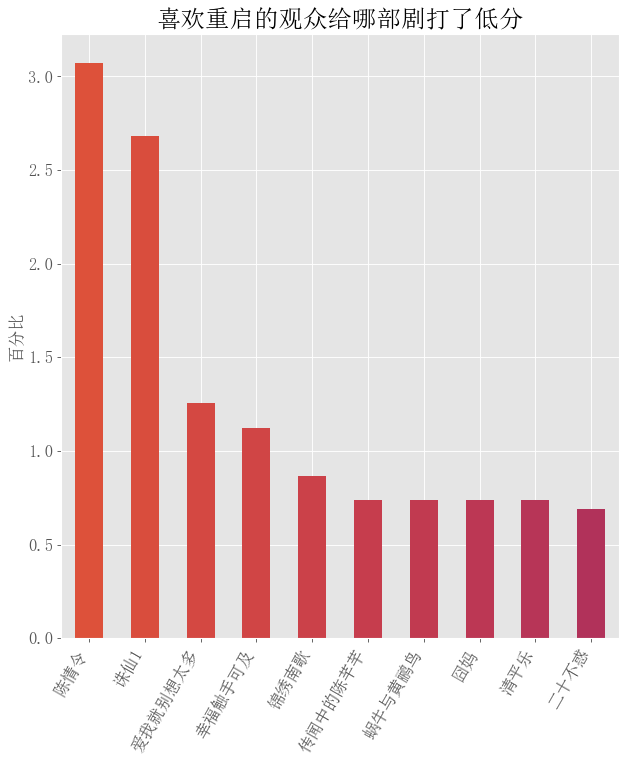

In [62]:
import numpy as np
color = cm.inferno_r(np.linspace(.4, .8, 30))
plt.figure(figsize=(9,10), dpi= 80)
tmp.plot.bar(color=color)
plt.gca().set_xticklabels(tmp.index, rotation=60, horizontalalignment= 'right')
plt.title("喜欢重启的观众给哪部剧打了低分", fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('百分比', fontsize=15)
plt.show()

In [63]:
high_data = data.loc[(data["uid"].isin(high_score_uid)) & (data["score"].isin([4.0, 5.0]))]
tmp = (high_data["movie"].value_counts()[1:11])
tmp1= pd.DataFrame(tmp)
tmp1.columns=["人数"]
tmp = (high_data["movie"].value_counts()[1:11]/(0.01*len(high_score_uid)))
tmp1

,人数
隐秘的角落,531
无心法师,527
锦绣南歌,404
穿越火线,392
热血同行,374
不完美的她,342
猎狐,325
将夜,323
完美关系,299
99分女朋友,291


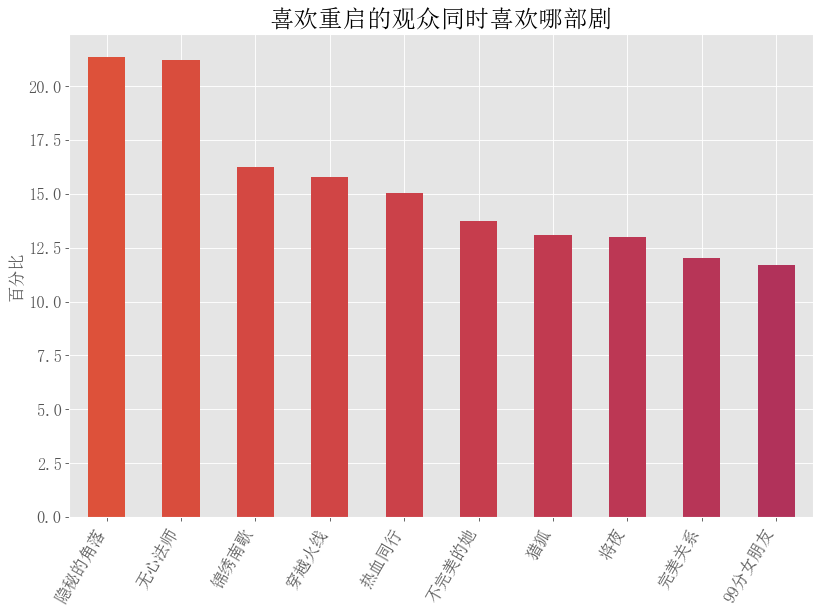

In [64]:
import numpy as np
color = cm.inferno_r(np.linspace(.4, .8, 30))
plt.figure(figsize=(12,8), dpi= 80)
tmp.plot.bar(color=color)
plt.gca().set_xticklabels(tmp.index, rotation=60, horizontalalignment= 'right')
plt.title("喜欢重启的观众同时喜欢哪部剧", fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('百分比', fontsize=15)
plt.show()

In [66]:
low_score_uid = data.loc[(data["movie"]=="重启之极海听雷") & (data["score"].isin([1.0, 2.0]))]["uid"]
high_data = data.loc[(data["uid"].isin(low_score_uid)) & (data["score"].isin([4.0, 5.0]))&(data["movie"]!="重启之极海听雷")]
tmp = (high_data["movie"].value_counts()[:10])
tmp1= pd.DataFrame(tmp)
tmp1.columns=["人数"]
tmp = (high_data["movie"].value_counts()[:10]/(5.87))
tmp1

,人数
隐秘的角落,147
龙岭迷窟,59
三十而已,51
陈情令,40
我是余欢水,38
穿越火线,38
庆余年第一季,30
传闻中的陈芊芊,28
河神,25
诛仙1,25


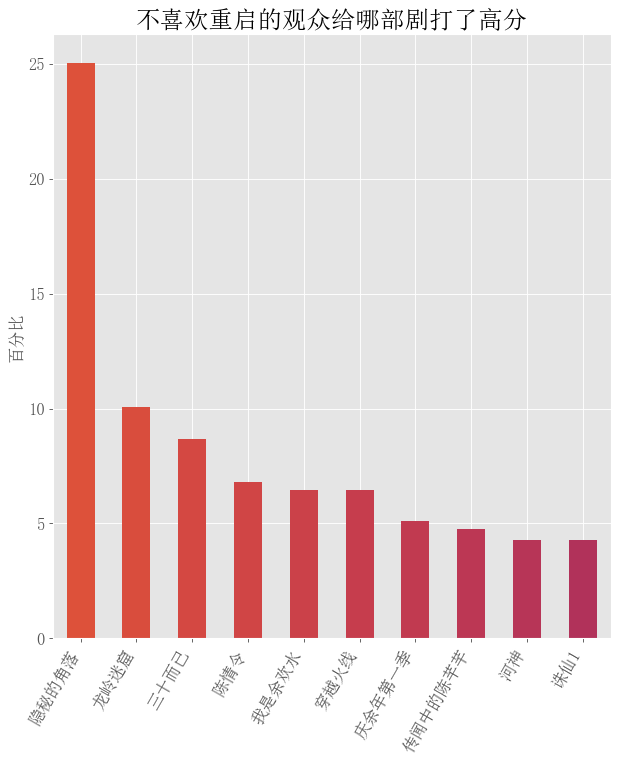

In [67]:
color = cm.inferno_r(np.linspace(.4, .8, 30))
plt.figure(figsize=(9,10), dpi= 80)
tmp.plot.bar(color=color)
tmp
plt.gca().set_xticklabels(tmp.index, rotation=60, horizontalalignment= 'right')
plt.title("不喜欢重启的观众给哪部剧打了高分", fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('百分比', fontsize=15)
plt.show()

In [211]:
low_data = data.loc[(data["uid"].isin(low_score_uid)) & (data["score"].isin([1.0, 2.0]))]
low_data["movie"].value_counts()[:20]

重启之极海听雷    471
穿越火线        32
传闻中的陈芊芊     28
幸福触手可及      23
月上重火        21
二十不惑        21
秋蝉          19
陈情令         19
三十而已        17
锦绣南歌        16
暮白首         14
诛仙1         13
三生三世枕上书     12
清平乐         12
爱我就别想太多     12
局中人         11
河神          11
天舞纪         11
少年的你        11
天醒之路        10
Name: movie, dtype: int64

In [136]:
high_score_comment = list(data.loc[(data["movie"]=="重启之极海听雷‎ (2020)") & (data["score"].isin([4.0, 5.0]))]["comment"])

In [137]:
import jieba
high_score_comment = [i for i in high_score_comment if i != "nan"]
high_score_comment =",".join(high_score_comment)
ex_list1 = jieba.cut(high_score_comment, use_paddle=True)
high_score_comment_cut = ' '.join(ex_list1)
high_score_comment_cut

''

In [138]:
low_score_comment = list(data.loc[(data["movie"]=="重启之极海听雷‎ (2020)") & (data["score"].isin([1.0, 2.0]))]["comment"])
low_score_comment = [i for i in low_score_comment if i != "nan"]
low_score_comment = ",".join(low_score_comment)

In [208]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#jieba.enable_paddle()
ex_list1 = jieba.cut(low_score_comment, use_paddle=True)

In [209]:
ex_list1

<generator object Tokenizer.cut at 0x7f94a90224a0>

In [210]:
low_score_comment_cut = ' '.join(ex_list1)
low_score_comment_cut

'对 朱一龙 太 失望 了 , 男主 形象 与 人设 和 我 心中 目标 不是 很 符合 剧情 改 的 一半 并且 黑瞎子 和 我 想 的 差距 太大 了 , 我 真的 服 了 这部 剧 的 弹幕 无脑 吹 的 那些 粉 了 看着 很 难受 放个 屁 都 能 香 半天 唉 , 现在 豆瓣 也 都 有 水军 了 吗 这能 8 分 剧情 推动 尬 的 我 头皮发麻 , 我 还是 喜欢 秦昊版 的 吴邪 受不了 尬 吹 颜值 演技 的 粉 , 失望 剧情 线 拉拉杂杂 说 不通 南派 三叔 果然 只是 商人 , 还是 喜欢 当初 的 吴邪 , 徐磊 能 不能 停止 影视 化盗 笔 系列 拍 出来 的 一部 比 一部 烂 , 一水 的 五星 客观 的 评价 这部 剧 就是 网剧 也 不 应该 这么 难看 女主颜值 没法 看 啊 , 不知所谓 拷贝 的 嘻嘻 , 太水 了 , 尬 雷 属于 偶像剧 粉丝 向 制作 还是 国产 一贯 水平 和 秦昊 爬山 比较 差距 明显 , 第一集 看 胖爷 唠嗑 还 挺 开心 下 了 墓 又 觉得 太 平淡 了 一种 可 看 可不 看 的 感觉 看书 的 时候 他们 是 盗墓 的 看剧 的 时候 他们 又 是 保护 文物 太 别扭 了 而且 小哥 还是 差点 意思 , 閒暇 看看 , 盗墓 笔记 还是 没有 鬼吹灯 好看 特别 是 潘粤明 版本 最好 , 为啥 又 是 盗墓 系列 怎么 老是 拍 不 完 的 感觉 , 一般 评分 虚高 , 吴邪 病 了 小哥 笑 的 太 多 了 二叔 莫名 感情 线 黑瞎子 也 不 在 吃 盒饭 了 三叔 这次 害 , 经历 了 潘粤明 和 秦昊 几部 高 水准 作品 的 一轮 托举 没想到 国产 剧 还 能 这么 次 的 导演 存在 演员 们 也 是 用力 过猛 不帅 耍帅 土土 的 跟着 导演 瞎演 一部 用来 浪费时间 的 好 剧本 着 爱 我 中华 的 朴素 目的 给 个 1 星下 拉 一下 现在 这 难以置信 的 83 , 平衡 , 看 了 一集 实在 看不下去 了 毁 原著 啊 我 还是 去 看书 吧 , 其他 都 好 就 演 的 离 我 想象 太远 脱离 原著 看 还行 小哥 好 稚嫩 那个 什么 小姑娘 一 出来 实在 不可 劝退 , 该剧 讲述 了 吴邪 王胖子 张起 灵 铁三角 在 十年